<a href="https://colab.research.google.com/github/savirhkhan/Global-Terrorism-EDA/blob/main/Global_Terrorism_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [313]:
#importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
#connecting google drive with the colab inviroment where--dataset is saved
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [315]:
#loading the data set from given path
df = pd.read_csv('/content/drive/MyDrive/Data sets/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [316]:
# checking first 5 rows to get the general overview of data frame
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [317]:
#checking how many total coloums and rows present in Data Frame it will show like(tota_rows,total_columns)
df.shape

(181691, 135)

In [318]:
#get the details of attiributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [319]:
# Checking how many variables has more than 70% NaN values and store the name of columns in the list columns_with_high_NaN
columns_with_high_NaN = [i for i in df.columns if df[i].isna().sum()*100/len(df)>70]
  

In [320]:
# Prints name of all the columns with more than 70% of NaN values
columns_with_high_NaN

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propvalue',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',
 

In [321]:
# removing the columns with more than 70% NaN values from data frame
df.drop(columns_with_high_NaN,inplace=True,axis=1)

In [322]:
# checking attributes of Data Frame after removing variales with high NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

In [323]:
# Renaming columns to align with meaning of variable
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region',
                       'attacktype1_txt':'AttackType','targtype1_txt':'Target','nkill':'fatalities','nwound':'injuries',
                       'summary':'Summary','gname':'Group','weaptype1_txt':'Weapon'},inplace=True)

In [324]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'Country',
       'region', 'Region', 'state', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'Summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'AttackType', 'targtype1', 'Target', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'Group', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1', 'Weapon',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'fatalities',
       'nkillus', 'nkillter', 'injuries', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propextent_txt', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [325]:
# Selcting the variables on which analysis will be performed
df_selected = df[['Year','Month','Day','Country','state','Region','AttackType','Target','fatalities','injuries','Summary','Group','Weapon']]

In [326]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   state       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   AttackType  181691 non-null  object 
 7   Target      181691 non-null  object 
 8   fatalities  171378 non-null  float64
 9   injuries    165380 non-null  float64
 10  Summary     115562 non-null  object 
 11  Group       181691 non-null  object 
 12  Weapon      181691 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


In [327]:
# checking stistics paramenter on continious variables of data frame
df_selected.describe()

,Year,Month,Day,fatalities,injuries
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


inference- as we can infer from above table  most  number of fatalities were 1570 and most number of injuries were 8191 throuout the data for a single incident.

## **Lets See Which Year was the most peacefull and which was the most violent year**

In [328]:
type(df_selected['Year'][0])

numpy.int64

In [329]:
plt.figure(figsize=(25,7),dpi=1000)
sns.countplot(data=df_selected,x='Year')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.title('Terror Attacks per Year', fontweight='bold',fontsize=17);

Inference-- As we see in the graph terrorist activities were moderately increasing from **1976** till **1992** and after that there was a slight declince  and after the year **2004** terrorist activities increased sharply.
year **2014** is most violent and year **1971** was least violent as per the data

## **Lets see top 10 countries affected most in terms of casualities and  number of attacks**

In [330]:
# creating a columns casualities by adding number of klled + the number of wounded
df_selected['casualities'] = df_selected['fatalities']+df_selected['injuries']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [331]:
# creating new Data Frame of 10 most affected countries in term of casualities
top_10_coutries_most_afftected = df_selected.nlargest(10,'casualities')

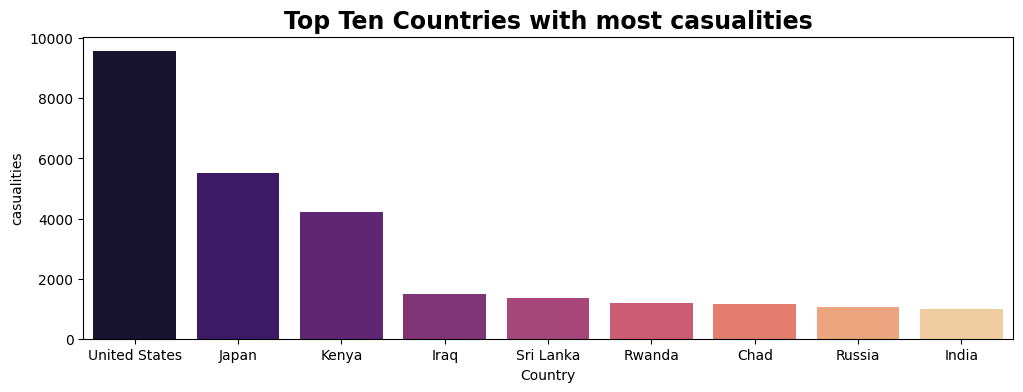

In [332]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(data=top_10_coutries_most_afftected,x='Country',y='casualities',palette='magma')
plt.title('Top Ten Countries with most casualities', fontweight='bold',fontsize=17);

Inference- **United States** has most number of Casualities(Killed+ Bounded), followed by **Japan** and **Kenya** 

In [333]:
# creating new Data Frame of 10 most affected countries in term of Attacks

most_attacked_countries = df_selected['Country'].value_counts()
ten_most_affected_countries = most_attacked_countries.sort_values(ascending=False).head(10)


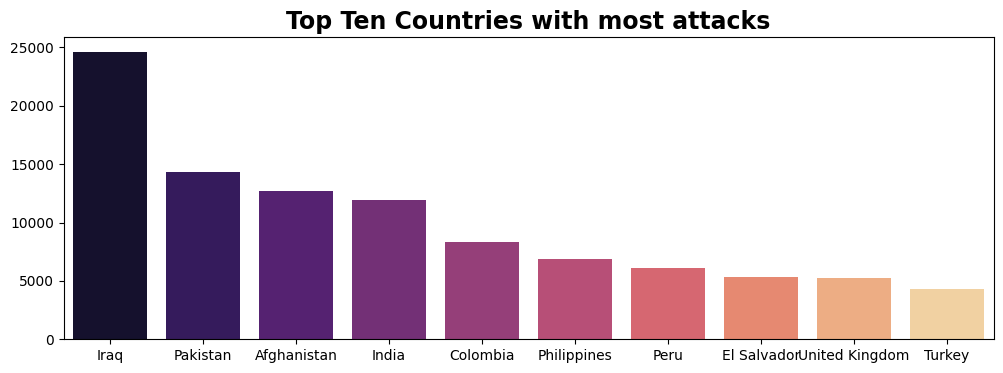

In [334]:
#Ploting the values
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=ten_most_affected_countries.index,y=ten_most_affected_countries.values,palette='magma')
plt.title('Top Ten Countries with most attacks', fontweight='bold',fontsize=17);

Inference- **Iraq** has most number of attacks followed by **Pakistan** and **Afghanistan**

In [335]:
df_region = df_selected['Region']

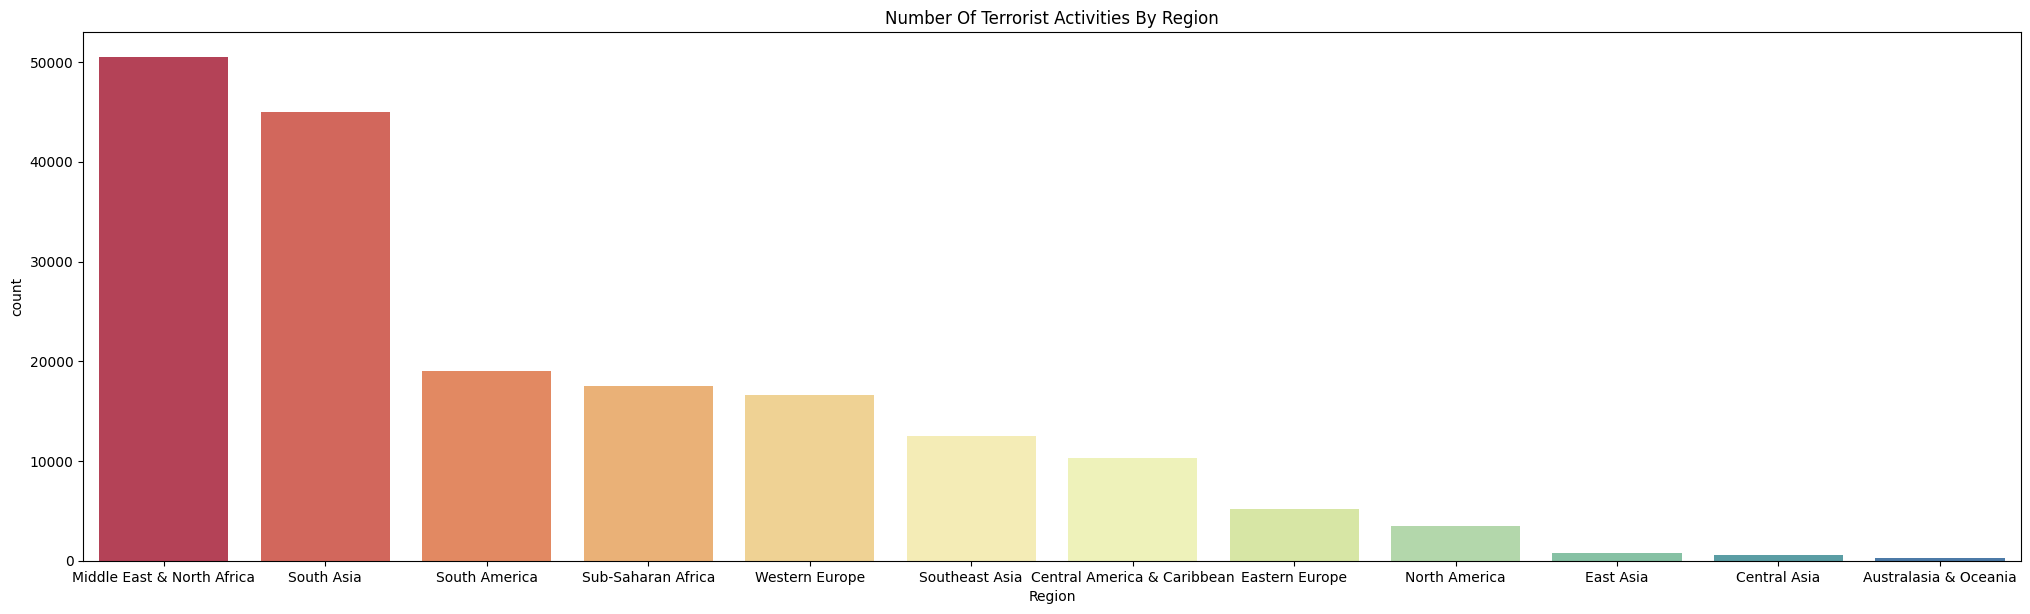

In [336]:
#plloting the data for Region
plt.figure(figsize=(25,7),dpi=100)
sns.countplot(data=df_selected,x='Region',palette='Spectral',order=df_selected['Region'].value_counts().index)
plt.title('Number Of Terrorist Activities By Region');


Inferece- Regions **Middle East and North Africa** followed by **South Asia** are more prone to terrorist acttacks, and **Australia & Oceania** has least number of attacks.
As South Asia Region is second most affected region,Lets choose India from South Asia to see the various factors involved in Terrorist Attacks

## **Lets Analyze data for INDIA to see number of Attacks and casualities through year**

In [337]:
# creating DF for India
df_india = df_selected[df_selected['Country'] == 'India']

In [338]:
#plotting the values
plt.figure(figsize=(25,7),dpi=1000)
sns.countplot(data=df_india,x='Year')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.title('Attacks per year on India', fontweight='bold',fontsize=17);

Inference- Attacks on India dramatically increased from year **2008** and year 2016 is when most number of attacks happen on india

**as seen above from year 2008 there is dramatic inrease in number of attacks happen on india, lets see the kind of attacks to get some understating **

In [339]:
#creating a DF off all the attacks after 2008
df_india_after_2008 = df_india[df_india['Year']>=2008]


In [340]:
df_india_after_2008['AttackType'].value_counts()

Bombing/Explosion                      3134
Armed Assault                          1899
Hostage Taking (Kidnapping)             976
Facility/Infrastructure Attack          864
Assassination                           328
Unknown                                 184
Unarmed Assault                         105
Hostage Taking (Barricade Incident)      41
Hijacking                                23
Name: AttackType, dtype: int64

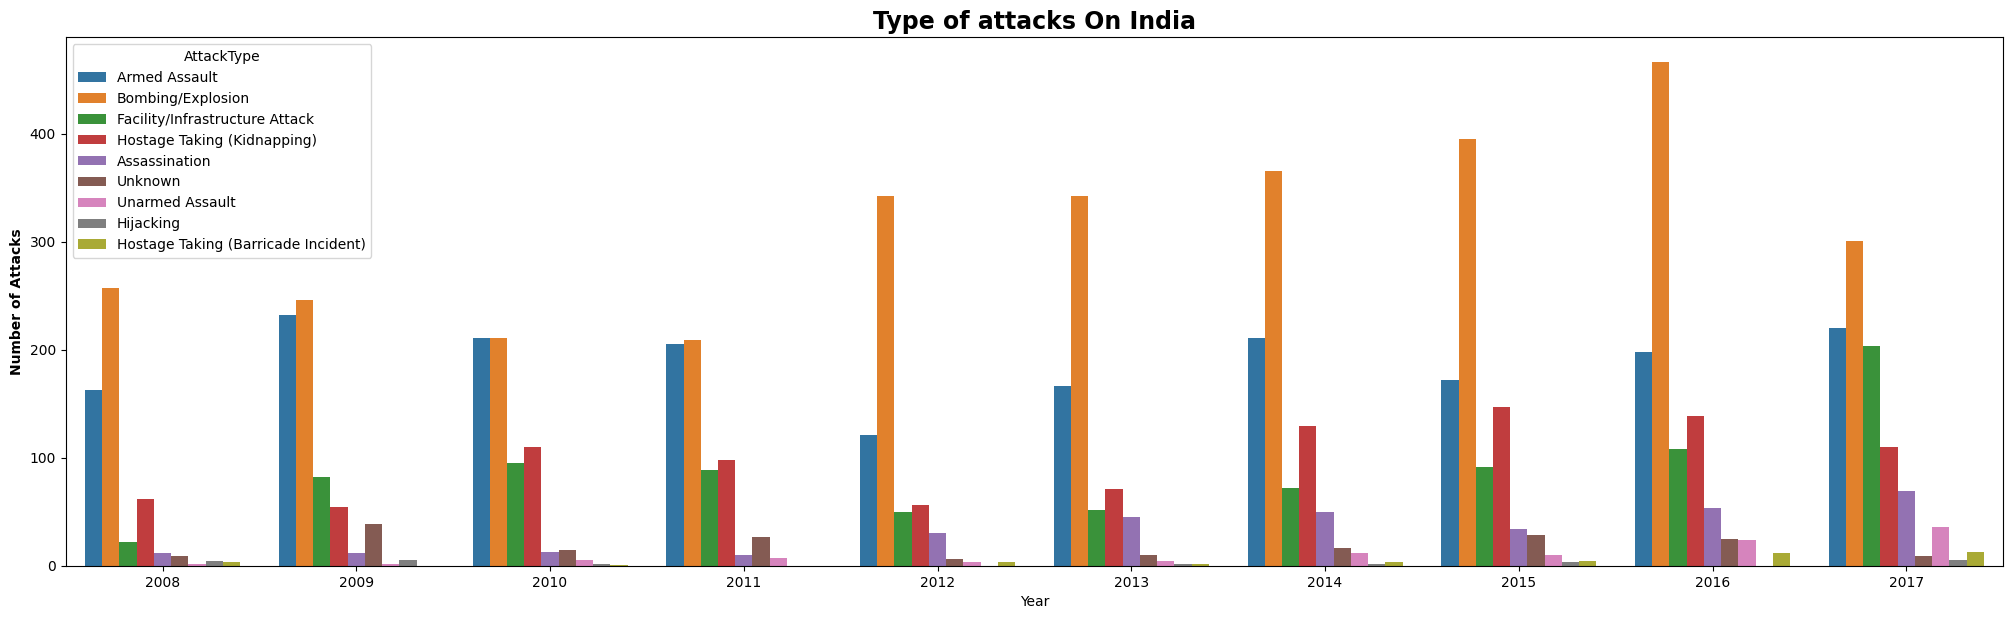

In [341]:
#plotting the data
plt.figure(figsize=(25,7),dpi=100)
sns.countplot(data=df_india_after_2008,x='Year',hue='AttackType')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.title('Type of attacks On India', fontweight='bold',fontsize=17);

Inferance- **Bombing/Explosion** is kind of attack happend in india mostly from 2008 till 2017 followed by **armed Assault**.


In [342]:

df_india['state'].value_counts().head(1)

Jammu and Kashmir    2454
Name: state, dtype: int64

Inference- Jammu and Kashmire incounter most number of terrerist activites in India.

In [343]:

df_india['state'].value_counts().tail(1)

Puducherry    2
Name: state, dtype: int64

Inference- Puducherry incounter least number of terrerist activites in India.

## **Let see the Ten most affected States in India**

In [344]:
# ten most affected states in india
df_india.groupby('state')['state'].count().sort_values(ascending=False).head(10)

state
Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: state, dtype: int64

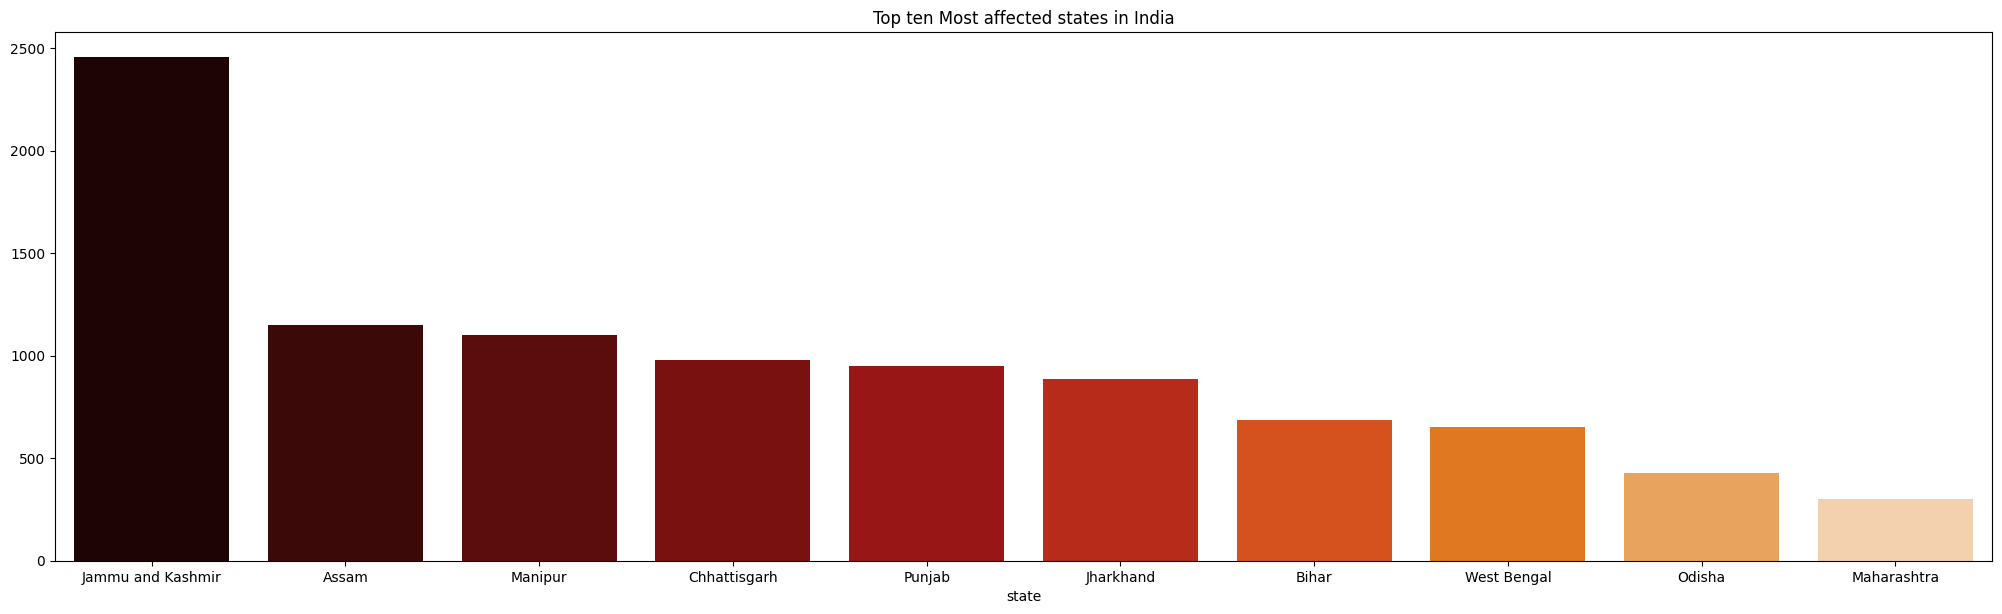

In [345]:
#Plotting the Values
plt.figure(figsize=(25,7),dpi=100)
sns.barplot(x=df_india.groupby('state')['state'].count().sort_values(ascending=False).head(10).index,y=df_india.groupby('state')['state'].count().sort_values(ascending=False).head(10).values,palette='gist_heat')
plt.title('Top ten Most affected states in India');


Inference- **J&K** is most affected state in india followed by **Assam** and **Manipur**.
we can infer that terrorist activiest in borde state are more as compare to other states


## **Lets Analyize various trends of the attacks on J&K-- most affected state state of india**

In [346]:
#Creating Dataframe for J&K
df_jk = df_india[df_india['state']=='Jammu and Kashmir']

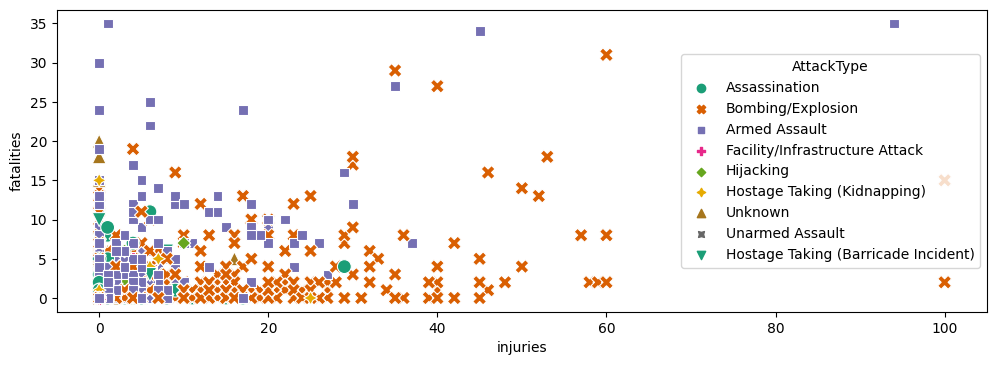

In [347]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df_jk,x='injuries',y='fatalities',hue='AttackType',palette='Dark2',s=100,style='AttackType')

Inference- Probability of fatalities is more when attack type is **Armed Assault** and probility of injuries is more when attack type is **Bombing/Explosion**

In [363]:
#plotting the data
plt.figure(figsize=(25,7),dpi=1000)
sns.countplot(data=df_jk,x='AttackType',hue='Target',palette='Dark2')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.title('Type of Attack vs Target', fontweight='bold',fontsize=17)
plt.legend(bbox_to_anchor=(0.5,1));


Inference-- **Plice** is most likly target for **Bombing/Explosion** and **Armed Assualt**,
for **hostage taking(kidnapping)** and **facility and infrastructure** attack type most likly target is **Religious figures/Institution**
And most **journalists** are targeted in **Unarmed Assault**.